# Quantum K means

This program simulates a quantum circuit for part of k means algorithm using Qiskit. \
Author: Michal Forgó \
Time: 02.18.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.

## 1. Introduction
Quantum K Means is a quantum-enhanced algorithm designed to perform clustering by leveraging quantum circuits to estimate distances between data points and centroids. This document explains the underlying quantum principles, the design rationale, and the step-by-step implementation of the algorithm—from its foundational theory to the complete simulation using Qiskit.

## 2. Quantum K means
### 2.1 Basic functionality 

The **Quantum K Means** algorithm leverages quantum computing to enhance the traditional k-means clustering process. Instead of relying solely on classical Euclidean distance calculations, this method uses a quantum circuit to perform distance estimation between a new data point and the centroids of various clusters. The quantum approach exploits interference and superposition to provide a probabilistic estimation of distances, potentially capturing complex relationships in the data.

The process consists of the following steps:

- **Data Encoding:**  
  Classical data values are transformed into quantum states using rotation gates. Specific rotation angles are computed from the data points and centroids, effectively encoding the information into the quantum circuit.

- **Quantum Circuit Execution:**  
  A quantum circuit is employed where Hadamard gates create a superposition of states, and controlled operations—such as controlled-swap gates—enable the interference between the new data point and each centroid. This interference pattern is then measured to estimate the distance between the data point and the centroids.

- **Result Interpretation:**  
  The measurement outcomes yield a probability distribution that indicates the similarity between the new data point and the cluster centroids. The centroid corresponding to the highest measurement count is selected as the quantum classification, while a classical Euclidean distance calculation can be used for comparison.

---

### 2.2 Quantum Gates Used

#### Hadamard (`H`) Gate
- **Purpose:** Creates equal superposition states, enabling quantum parallelism.
- **Role in K Means:** Prepares each qubit for the encoding of data features, setting the stage for interference.
  
$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

#### Rotation (`U`) Gate
- **Purpose:** Encodes classical numerical values into quantum states by applying rotations.
- **Role in K Means:** Maps the features of both the new data point and the centroids into phase rotations, facilitating the comparison through interference.
  
$$
U(\theta, \phi, \lambda) \quad \text{(with parameterization based on the specific implementation)}
$$

#### Controlled-Swap (`CSWAP`) Gate
- **Purpose:** Compares two quantum states by conditionally swapping their amplitudes using an ancillary qubit.
- **Role in K Means:** Enables the extraction of similarity information between the new data point and the centroids through quantum interference.
  
$$
\text{CSWAP: A gate that conditionally swaps two qubit states based on the state of a control qubit.}
$$

---

### 2.3 Data Encoding
#### Encoding Vector Coordinates into Qubits

To estimate distances on a quantum computer, we first convert the rectangular coordinates of our data points into spherical coordinates so they can be encoded on the Bloch sphere. The process is as follows:

- **Plotting and Identification:**  
  Imagine a scatter plot where the centroids are marked with colored Xs and a new data point is shown as a red dot.

- **Mapping Coordinates:**  
  To represent these points as qubits, we need to convert their (x, y) coordinates into spherical coordinates using two angles:
  - **θ (theta):** Encodes the vertical component and ranges from 0 to π.
  - **Φ (phi):** Encodes the horizontal component and is constrained (e.g., 0 to π) to maintain proportional phase differences.

- **Encoding Process:**  
  1. Start with a qubit initialized to |0⟩ and apply a Hadamard gate to rotate its state onto the x-axis.
  2. Set the rotation angles using:
  
     $$
     \theta = \frac{(d_1 + 1)\pi}{2}, \quad \phi = \frac{(d_0 + 1)\pi}{2},
     $$
  
     where $d_0$ and $d_1$ represent the x and y coordinates of the data point, respectively.

- **Ensuring Uniqueness:**  
  By limiting the range of Φ, we ensure that distinct data points remain distinguishable on the Bloch sphere even if they share the same θ value.

---

### 2.4 Quantum Circuit Execution

Computing Euclidean distances directly on a quantum computer is challenging due to the probabilistic nature of qubit measurements. Instead, we estimate similarity by measuring the inner product between quantum states representing our data points.

- **Core Idea:**  
  We encode each data point (e.g., a new point and a centroid) as a quantum state on the Bloch sphere. Instead of performing vector subtraction, we use the inner product as a proxy for distance.

- **Process Overview:**  
  1. **Ancillary Qubit Setup:** Start with an ancillary qubit in the |0⟩ state.
  2. **Superposition Creation:** Apply a Hadamard gate to put the ancillary qubit into a superposition.
  3. **Controlled Operations:** Use a controlled-swap (CSWAP) gate to entangle the ancillary qubit with the states representing the new data point and a centroid.
  4. **Interference and Measurement:** Apply a second Hadamard gate and measure the ancillary qubit. The probability of obtaining a |1⟩ outcome is directly related to the inner product between the two states.
  
- **Why It Works:**  
  A higher probability of measuring |1⟩ indicates a larger inner product, which, for normalized vectors, is positively correlated with a smaller Euclidean distance. Thus, the centroid with the highest count of |1⟩ measurements is considered the closest.

---

### 2.5 Result Interpretation

After executing the quantum circuit multiple times, we analyze the measurement outcomes to determine which centroid is closest to the new data point. Here’s how:

- **Measurement Outcomes:**  
  The circuit is designed so that if the quantum states representing the new data point and a centroid are similar (i.e., the data point is closer to that centroid), the interference will cause the ancillary qubit to more frequently collapse to the |1⟩ state.

- **Statistical Analysis:**  
  Since quantum measurements are probabilistic, the circuit is run many times (with a high number of shots). We then count how many times the outcome |1⟩ is observed for each centroid.

- **Choosing the Closest Centroid:**  
  The centroid associated with the highest count of |1⟩ outcomes is deemed the closest. This approach uses the fact that the inner product (and thus the probability of measuring |1⟩) is positively correlated with the closeness of the data points.

---

### 2.6 Advantages of Quantum K Means

- **Parallel Distance Estimation:** The quantum circuit allows simultaneous comparison between the new data point and multiple centroids, reducing the need for sequential computations.
- **Enhanced Clustering Capability:** Quantum measurement probabilities can capture complex, non-linear relationships in the data that may be overlooked by classical Euclidean metrics.
- **Scalability:** Integrating quantum techniques with classical clustering algorithms opens up possibilities for handling large datasets more efficiently.

The Quantum K Means algorithm exemplifies how quantum computing can augment traditional clustering methods by harnessing quantum parallelism and interference, making it a promising approach for advanced data analysis tasks.

## 3. Code

### 3.1 Setup
#### 3.1.1 Importing
Firstly, we need to import the necessary libraries for the program to work. If you already hasn't done install the requirements.txt or enviroment.yml.

In [128]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#### 3.1.2 Data Loading, New Point Definition, and Centroid Calculation
Now we need to prepare our data. The process begins by reading data from a CSV file named `kmeans_data.csv`. Only the columns `Feature 1`, `Feature 2`, and `Class` are selected, ensuring that only the necessary data is loaded into the program.

Once the data is loaded, it is filtered based on the class labels "Green", "Blue", and "Black". Boolean masks are created for each class, and the corresponding subsets are extracted from the main dataset. For these subsets, the `Class` column is removed to focus solely on the numerical features required for subsequent calculations.

In addition to processing the existing dataset, the code defines a new data point with specific coordinates. This new point, with values -0.161 for Feature 1 and 0.141 for Feature 2, is intended to be compared against the computed centroids.

The final step in this section involves calculating the centroids for each class. For every class subset, the mean of `Feature 1` and `Feature 2` is computed. These centroids serve as a representation of the average characteristics of each class, forming the basis for the distance calculations in the clustering algorithm.

Down bellow you can see the visualisation.



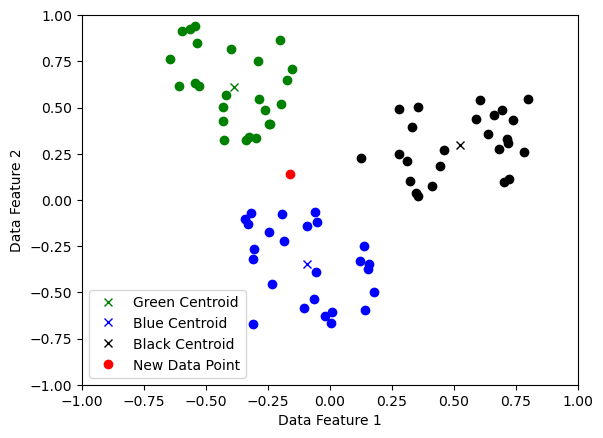

In [129]:
ig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

data = pd.read_csv('kmeans_data.csv', usecols=['Feature 1', 'Feature 2', 'Class'])

maskGreen = data['Class'] == 'Green'
maskBlue = data['Class'] == 'Blue'
maskBlack = data['Class'] == 'Black'

dataGreen = data[maskGreen].drop(['Class'], axis=1)
dataBlue = data[maskBlue].drop(['Class'], axis=1)
dataBlack = data[maskBlack].drop(['Class'], axis=1)

newPointX = -0.161
newPointY = 0.141

greenCentroidX = dataGreen['Feature 1'].mean()
greenCentroidY = dataGreen['Feature 2'].mean()
blueCentroidX = dataBlue['Feature 1'].mean()
blueCentroidY = dataBlue['Feature 2'].mean()
blackCentroidX = dataBlack['Feature 1'].mean()
blackCentroidY = dataBlack['Feature 2'].mean()

for xVal, yVal, colour in zip(data["Feature 1"], data["Feature 2"], data["Class"]):
    match colour:
        case "Green":
            plt.plot(xVal, yVal, "go")
        case "Blue":
            plt.plot(xVal, yVal, "bo")
        case "Black":
            plt.plot(xVal, yVal, "ko")

plt.plot(greenCentroidX, greenCentroidY, 'gx', label='Green Centroid')
plt.plot(blueCentroidX, blueCentroidY, 'bx', label='Blue Centroid')
plt.plot(blackCentroidX, blackCentroidY, 'kx', label='Black Centroid')
plt.plot(newPointX, newPointY, 'ro', label='New Data Point')

plt.axis([-1, 1, -1, 1])
plt.legend()
plt.show()


#### 3.1.2 Storage

We also need to store our data somewhere so we will allocate some registers.

- **regA**  
  - A quantum register named "regA" is created with 3 qubits.
  - First two qubits serve to encode the quantum states representing the data for distance calculations.
  - The third one is a ancilla qubit 

- **regC**  
  - A classical register named "regC" is created with 1 bit.  
  - This register is used to store the measurement outcomes from the quantum operations.

In [130]:
regA = QuantumRegister(3, "regA")
regC = ClassicalRegister(1, "regC")
qc = QuantumCircuit(regA, regC, name="qc")

#### 3.1.3 Encoding Classical Data into Quantum States

This section prepares the rotation angles needed to encode classical data into quantum states. The transformation applied to each data value converts it into a corresponding rotation angle in radians. This mapping is crucial for using quantum rotation gates to embed the classical data within the quantum circuit.

- **Angle Transformation:**  
  - Each value is transformed using the formula:  
    `angle = ((value + 1) * π/2)`.
    
- **Data Mapping:**  
  - **Index 0:** Represents the new data point.
  - **Indices 1, 2, 3:** Correspond to the centroids of the Green, Blue, and Black classes, respectively.

The code snippet below computes two lists of angles:
- `phiAngles` for the x-coordinates.
- `thetaAngles` for the y-coordinates.

In [131]:
phiAngles = [((x + 1) * math.pi / 2) for x in [newPointX, greenCentroidX, blueCentroidX, blackCentroidX]]
thetaAngles = [((y + 1) * math.pi / 2) for y in [newPointY, greenCentroidY, blueCentroidY, blackCentroidY]]

### 3.2 Execution
#### 3.2.1 Quantum Circuit Execution and Distance Estimation

This section executes the quantum circuit on the AerSimulator to estimate the distance between a new data point and each class centroid. The process involves several key steps:

- **Simulator Initialization:**
  - An `AerSimulator` backend is created with 5000 shots to perform multiple executions, ensuring statistical reliability of the measurements.

- **Measurement Storage:**
  - An empty list, `measurementResults`, is initialized to collect the measurement counts corresponding to the outcome '1' for each class comparison.

- **Iterative Execution for Each Centroid:**
  - For each centroid (corresponding to the Green, Blue, and Black classes with indices 1 to 3 in the angle lists), the circuit undergoes the following operations:
    - **Hadamard Gates:**  
      Apply Hadamard gates to all qubits to generate an equal superposition state.
    - **Data Encoding:**  
      - Encode the new data point on qubit 0 using its predefined rotation angles.
      - Encode the current centroid on qubit 1 using its respective rotation angles.
    - **Controlled-Swap Operation:**  
      Perform a controlled-swap (CSWAP) between qubit 0 and qubit 1, with qubit 2 (the ancillary qubit) acting as the control.
    - **Interference Setup:**  
      Apply a second Hadamard gate to the ancillary qubit to enable quantum interference, which is essential for extracting the distance information.
    - **Measurement:**  
      Measure the ancillary qubit, storing the result in the classical register.
    - **Circuit Execution:**  
      Transpile and execute the circuit on the simulator, retrieve the measurement counts, and print them for debugging purposes.
    - **Result Collection:**  
      Append the count for the '1' outcome (defaulting to 0 if not present) to the `measurementResults` list.
    - **Circuit Reset:**  
      Reset the quantum register to prepare the circuit for the next centroid comparison.

- **Final Output:**
  - After iterating through all centroids, the measurement results for each class (Green, Blue, Black) are printed, providing a basis for comparing the distances between the new data point and each centroid.


In [132]:
sim = AerSimulator(shots=5000)
measurementResults = []

for i in range(1, 4):
    qc.h(regA)
    qc.u(thetaAngles[0], phiAngles[0], 0, regA[0])
    qc.u(thetaAngles[i], phiAngles[i], 0, regA[1])
    qc.cswap(regA[2], regA[0], regA[1])
    qc.h(regA[2])
    qc.measure(regA[2], regC[0])
    
    qc.barrier()
    circ = transpile(qc, sim)
    result = sim.run(circ).result()
    counts = result.get_counts(circ)
    print(f"Measurement counts for class index {i-1}: {counts}")
    measurementResults.append(counts.get("1", 0))
    qc.reset(regA)

print("Measurement results:", measurementResults)

Measurement counts for class index 0: {'0': 4654, '1': 346}
Measurement counts for class index 1: {'0': 4673, '1': 327}
Measurement counts for class index 2: {'0': 4899, '1': 101}
Measurement results: [346, 327, 101]


#### 3.2.3 Class Assignment and Comparison

In this section, the classification results are finalized by comparing both quantum and classical approaches. The code begins by defining a list of class labels, namely 'Green', 'Blue', and 'Black'. For the quantum prediction, the class associated with the highest measurement count from the quantum circuit is selected as the predicted class. Simultaneously, the Euclidean distances between the new data point and each class centroid are calculated using the `math.hypot` function, and the class with the smallest distance is chosen as the classical prediction. The outcomes of both methods are then printed for comparison, offering insight into how the quantum distance estimation aligns with traditional Euclidean measures. Finally, the quantum circuit is drawn without barriers for clarity.

Quantum distance estimation: The new data point is classified as 'Green'.
Euclidean distances: [0.5202853247978458, 0.4905204028376394, 0.7014755294377703]
Classical Euclidean distance: The new data point is classified as 'Blue'.


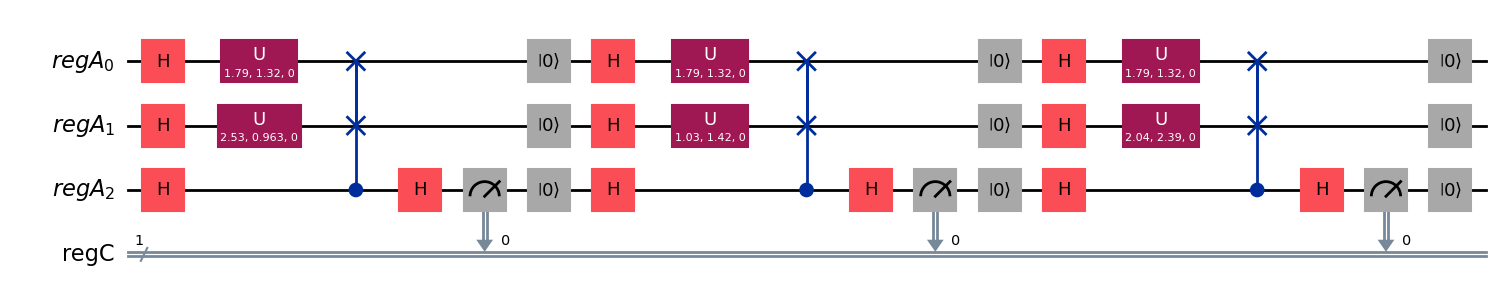

In [133]:
classLabels = ['Green', 'Blue', 'Black']

quantumPredictedClass = classLabels[measurementResults.index(max(measurementResults))]

euclideanDistances = [
    math.hypot((newPointX - centroidX), (newPointY - centroidY))
    for centroidX, centroidY in [
        (greenCentroidX, greenCentroidY),
        (blueCentroidX, blueCentroidY),
        (blackCentroidX, blackCentroidY)
    ]
]

classicalPredictedClass = classLabels[euclideanDistances.index(min(euclideanDistances))]

print(f"Quantum distance estimation: The new data point is classified as '{quantumPredictedClass}'.")
print("Euclidean distances:", euclideanDistances)
print(f"Classical Euclidean distance: The new data point is classified as '{classicalPredictedClass}'.")

qc.draw("mpl", plot_barriers=False)